<b>Problem Statement :-</b><br>
The aim is to build a predictive model and find out the sales of each product at a particular store. Create a model by which Big Mart can analyse and predict the outlet production sales.

A perfect project to learn Data Analytics and apply Machine Learning algorithms (Linear Regression, Random Forest Regressor, XG Boost) to predict the outlet production sales.

In [334]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [335]:
train = pd.read_csv('Train.csv')

In [336]:
train.shape

(8523, 12)

In [337]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [338]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Checking for null values

In [339]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [340]:
per=train.isnull().sum()*100/len(train)
per

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

The % of missing values(>5%) are too much to be dropped , so they are to be handled.

handling duplicate values

In [341]:
train.duplicated().any()

False

In [342]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<p3>Checking for Outliers in the data</p3>

In [344]:
fig = px.box(train,y = 'Item_Weight')
fig.show()

"Item_Weight" has no outliers.

<p1>Owing to the fact that there are no outliers in the data, hence, we impute the null values in Item_Weight by the mean of the other values present.</p1>

In [345]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

Since Outlest_Size is a categorical value, hence, we remove the null values by replacing it with the mode,that is, the most frequently occuring value.

In [346]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [347]:
train['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

In [348]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [349]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [350]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [351]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Removing the irregularities in the dataset.

In [352]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [353]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [354]:
test['Item_Fat_Content'].value_counts()

1    3396
2    1935
0     206
4      78
3      66
Name: Item_Fat_Content, dtype: int64

In [355]:
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [356]:
test['Item_Fat_Content'].value_counts()

1    3396
2    1935
0     206
4      78
3      66
Name: Item_Fat_Content, dtype: int64

In [357]:
train['Years in Business'] = train['Outlet_Establishment_Year'].apply(lambda x:2022-x)

In [358]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years in Business
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [359]:
fig = px.histogram(train,x = 'Item_Fat_Content',color='Item_Fat_Content')
fig.show()

In [360]:
fig = px.histogram(train,x = 'Item_Type',color = 'Item_Type' )
fig.show()

In [361]:
fig = px.histogram(train,'Outlet_Size',color='Outlet_Size')
fig.show()

In [362]:
fig = px.histogram(train,'Outlet_Location_Type',color ='Outlet_Location_Type' )
fig.show()

In [363]:
fig = px.histogram(train,'Outlet_Type',color = 'Outlet_Type')
fig.show()

In [364]:
fig = px.histogram(train,'Years in Business',color ='Years in Business')
fig.show()

In [365]:
fig = px.scatter(train,x = 'Item_MRP',y = 'Item_Outlet_Sales',color='Outlet_Size')
fig

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

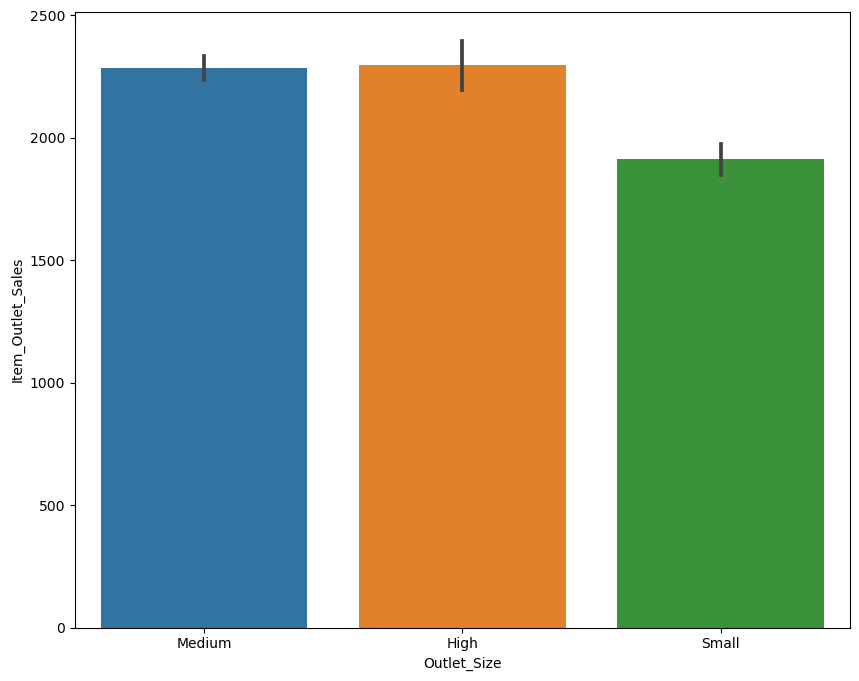

In [366]:
plt.figure(figsize = (10,8))
sns.barplot(data = train,x = 'Outlet_Size',y = 'Item_Outlet_Sales')

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

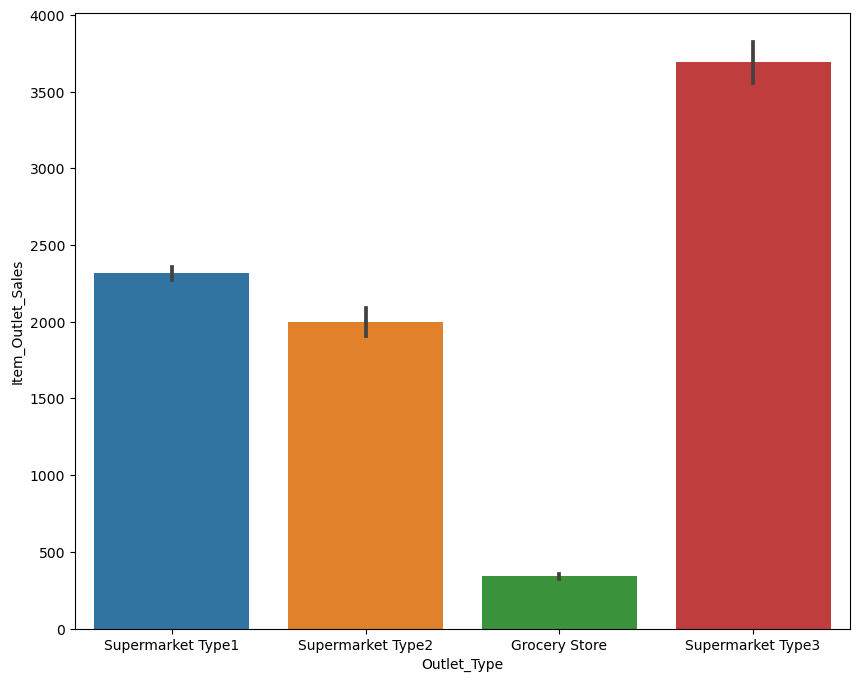

In [367]:
plt.figure(figsize = (10,8))
sns.barplot(data = train,x = 'Outlet_Type',y = 'Item_Outlet_Sales')

<Axes: xlabel='Years in Business', ylabel='Item_Outlet_Sales'>

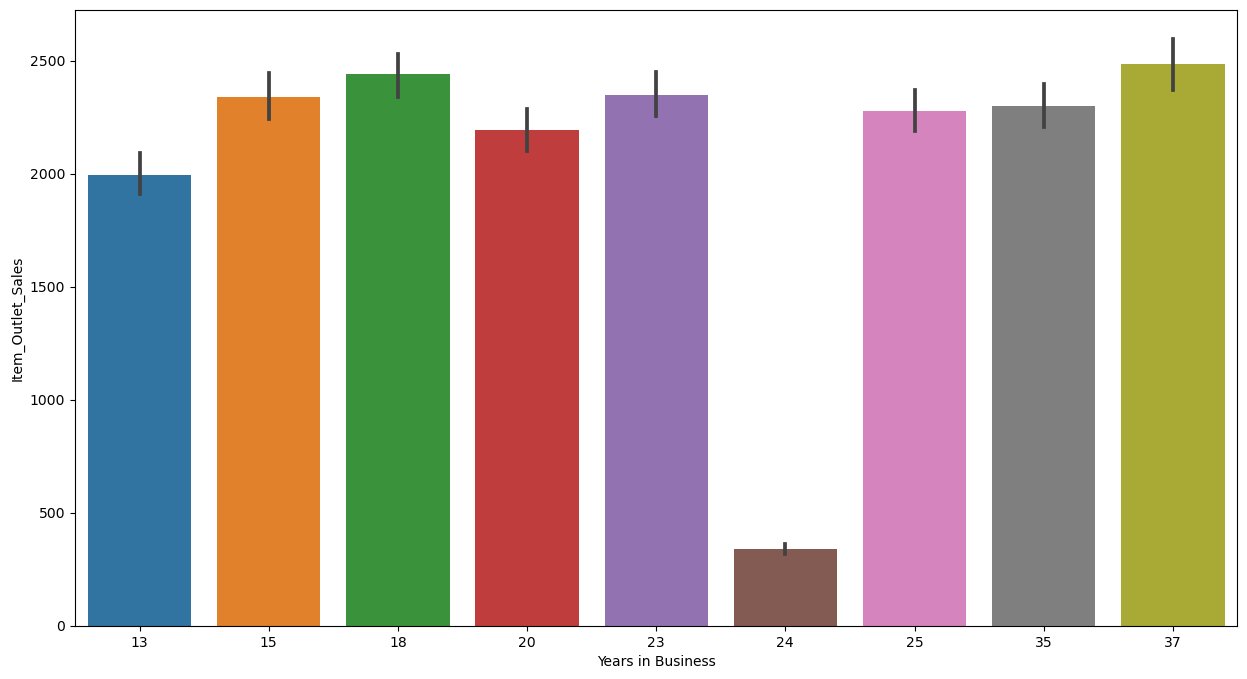

In [368]:
plt.figure(figsize = (15,8))
sns.barplot(data = train,x = 'Years in Business',y = 'Item_Outlet_Sales')

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

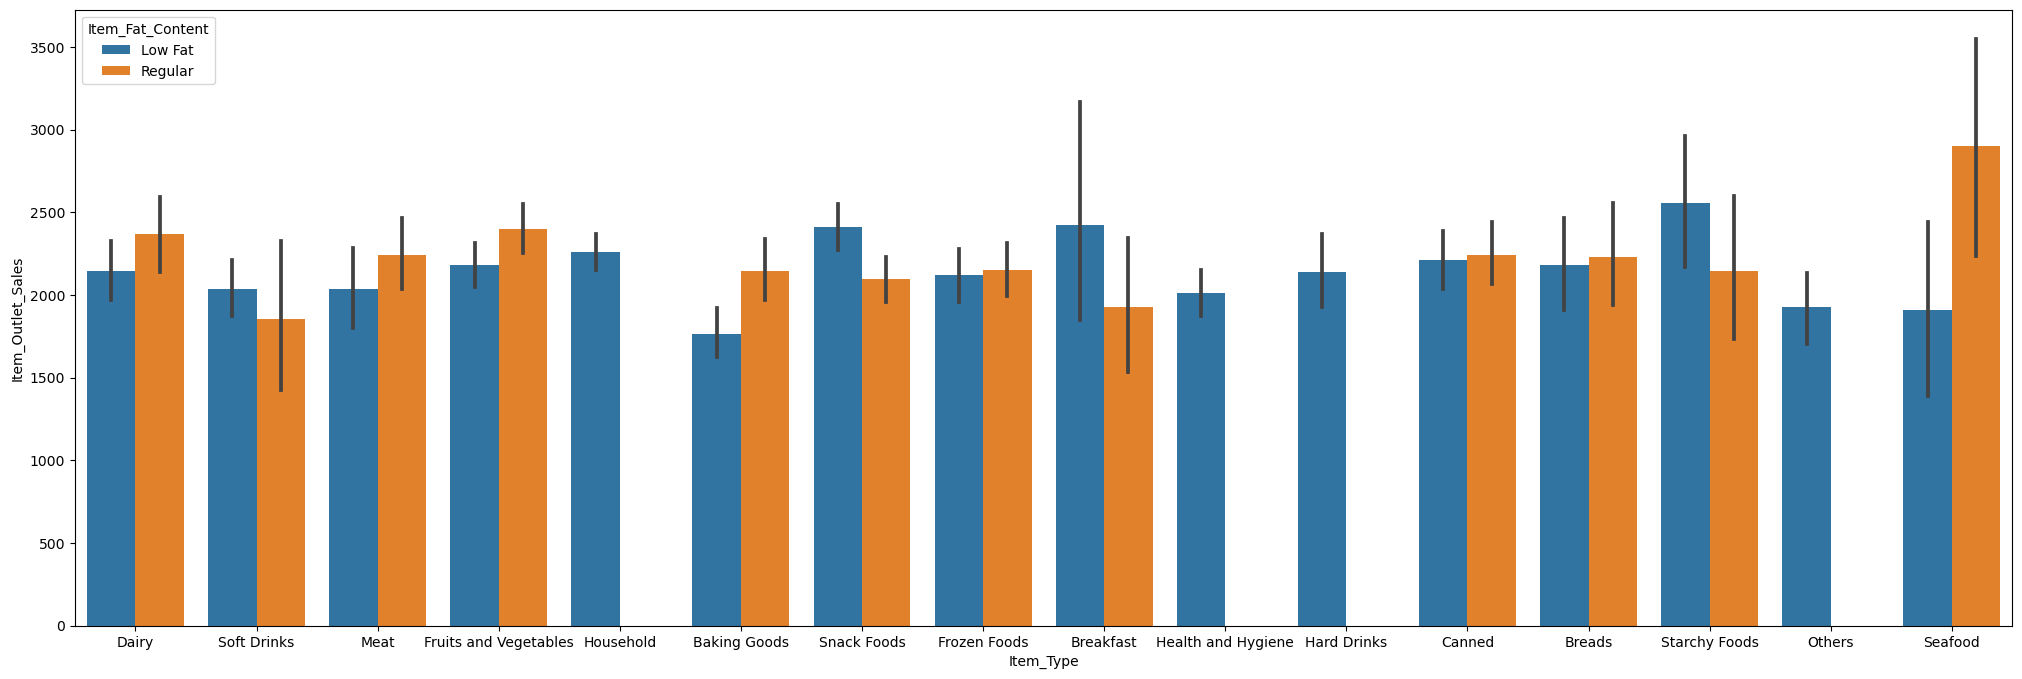

In [369]:
plt.figure(figsize = (25,8))
sns.barplot(x = 'Item_Type',y = 'Item_Outlet_Sales',hue = 'Item_Fat_Content',data = train)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

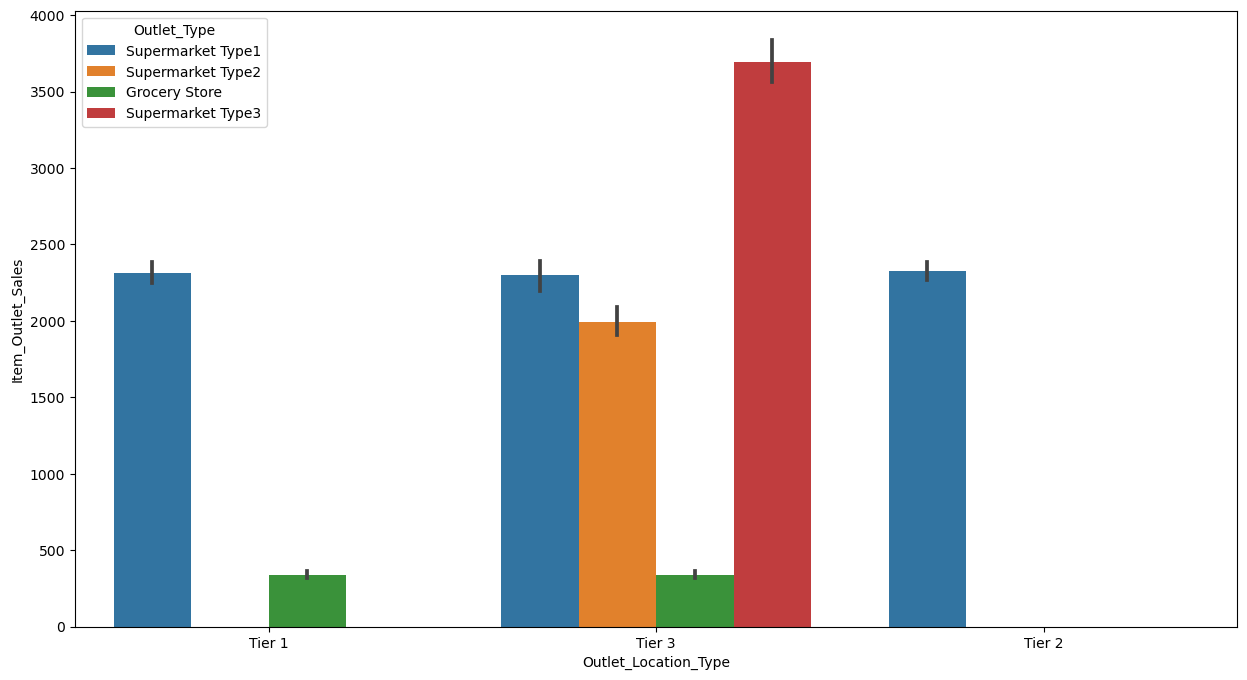

In [370]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',data = train,hue = 'Outlet_Type')

In [371]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years in Business
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [372]:
le = LabelEncoder()
categorical = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for ele in categorical:
    train[ele] = le.fit_transform(train[ele])
for ele in categorical:
    test[ele] = le.fit_transform(test[ele])

In [373]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years in Business'],
      dtype='object')

In [374]:
X = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Years in Business']]
y = train['Item_Outlet_Sales']

In [375]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=101)

### Linear Regression

In [376]:
lr = LinearRegression()

In [377]:
lr.fit(X_train,y_train)

LinearRegression()

In [378]:
predictions = lr.predict(X_test)

In [379]:
from sklearn.metrics import mean_squared_error

In [380]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

RMSE: 1142.3122849406036


### Decision Tree Regressor

In [381]:
from sklearn.tree import DecisionTreeRegressor 

In [382]:
dr = DecisionTreeRegressor(random_state = 101)
dr.fit(X_train, y_train)
y_pred = dr.predict(X_test)

In [383]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 1510.9986594994102


### Random Forest Regressor

In [384]:
from sklearn.ensemble import RandomForestRegressor

In [385]:
rf = RandomForestRegressor(n_estimators=200,max_depth = 5,min_samples_leaf = 100,n_jobs = 4,random_state = 101)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [386]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))

RMSE: 1032.922622910026


Hence,clearly, the random forest regressor performs better